<a href="https://colab.research.google.com/github/onkardc/DesignOptimization2021Fall/blob/main/DO_H4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

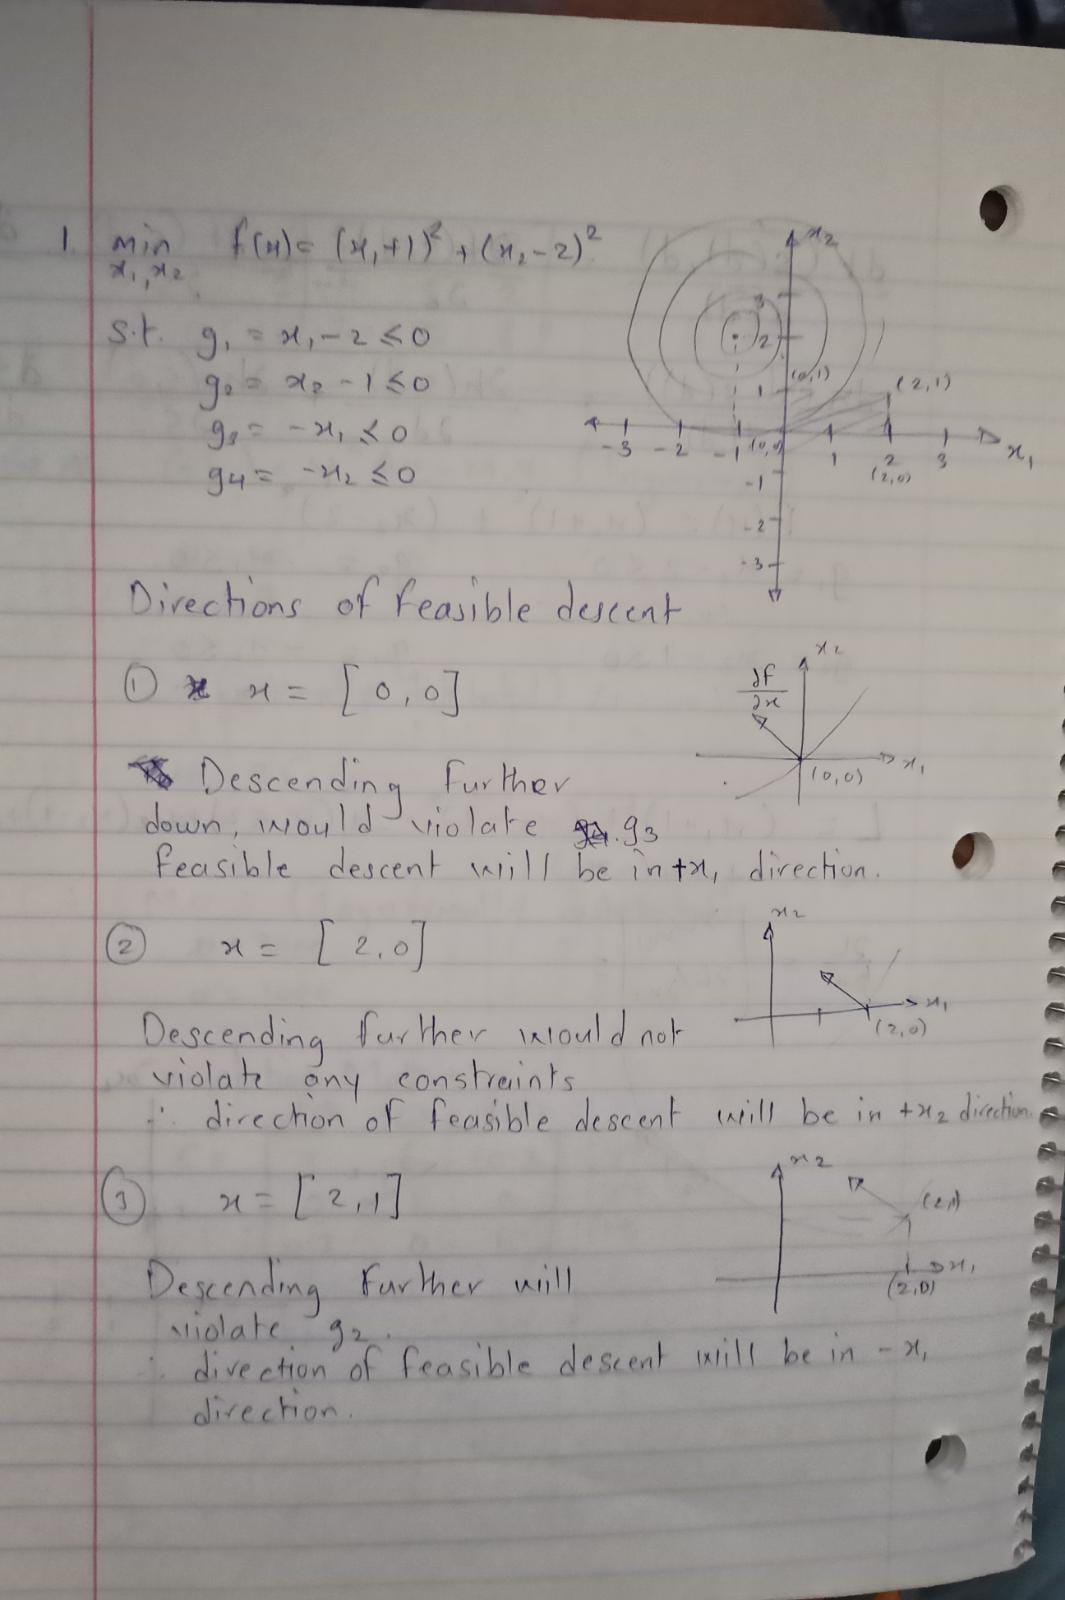

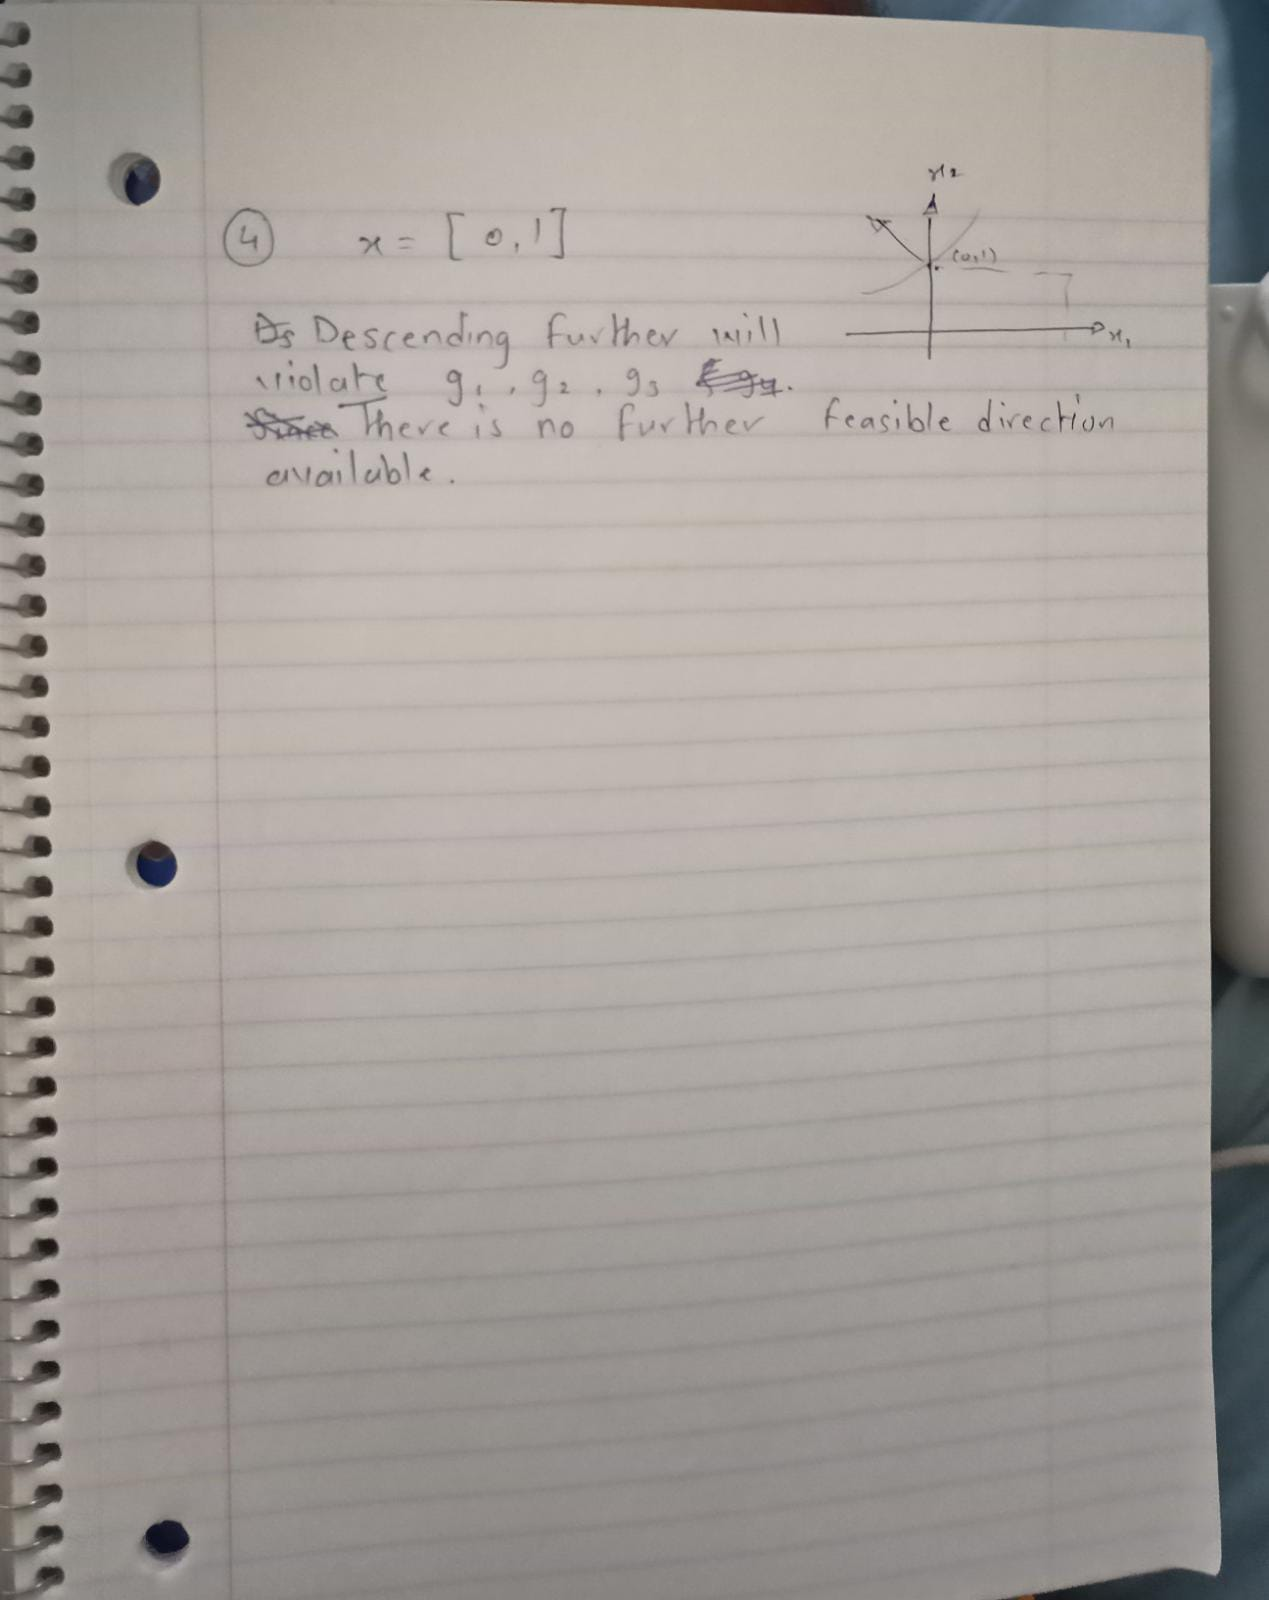

##Problem 2

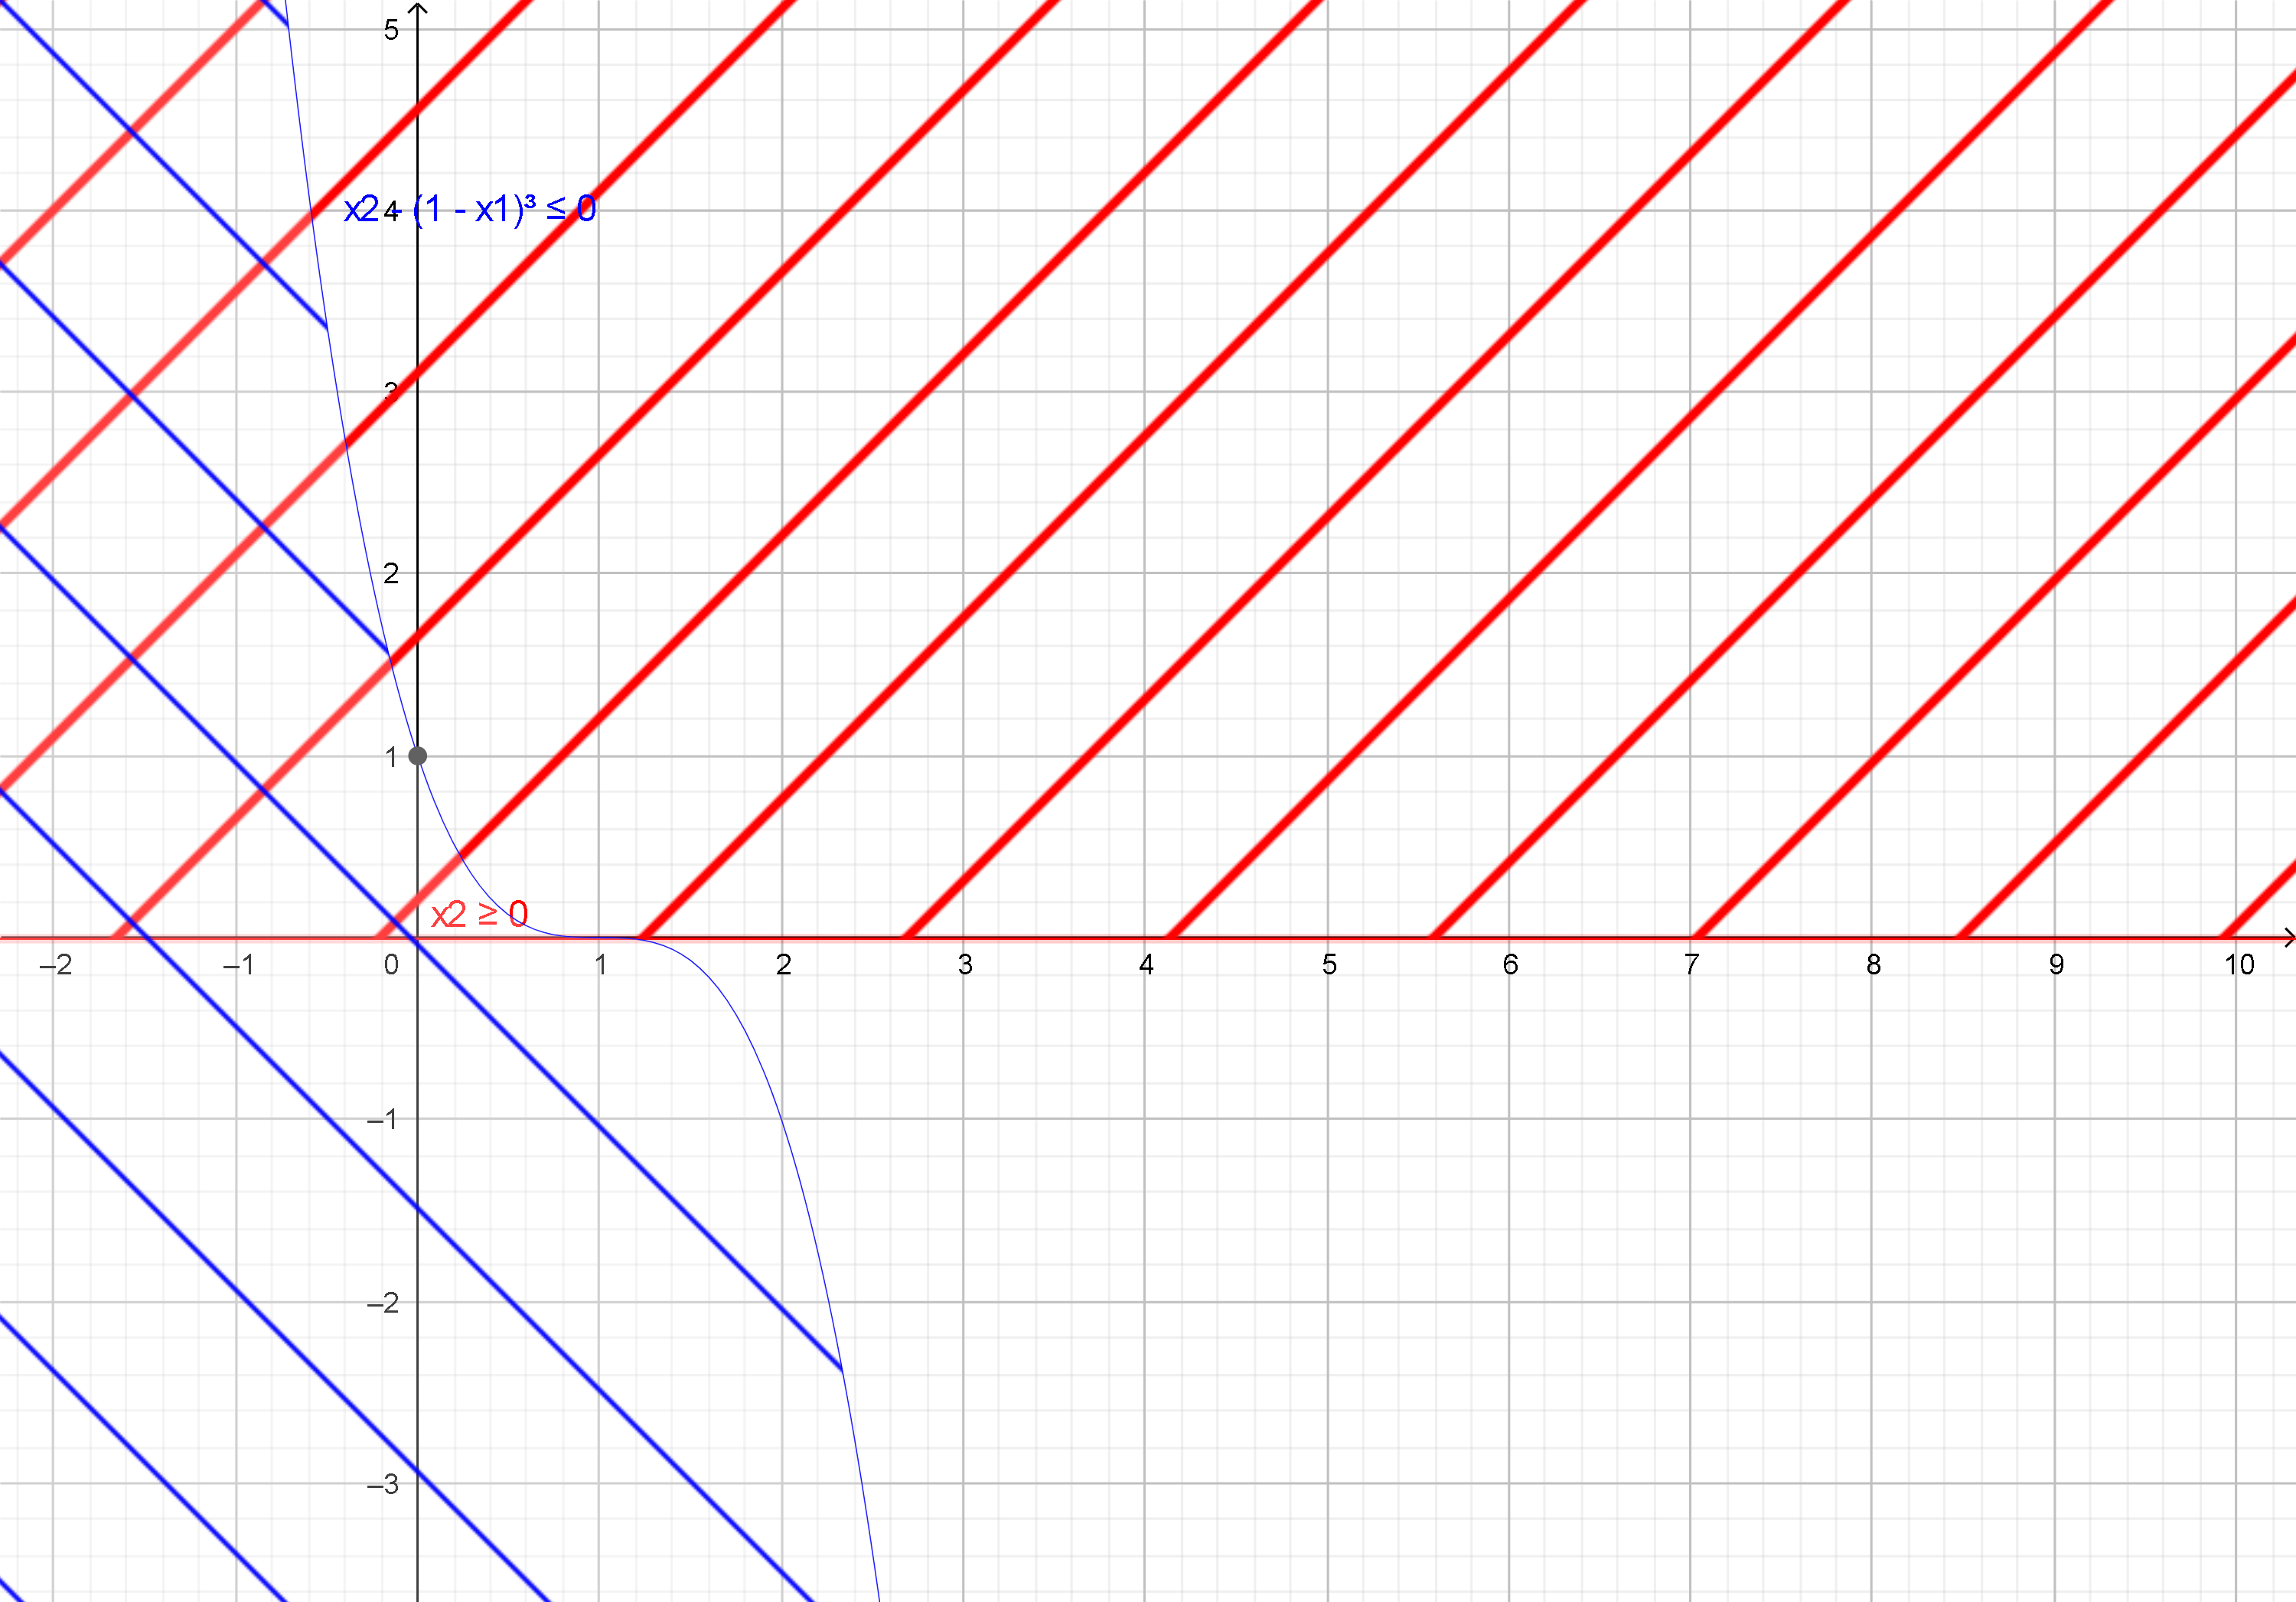

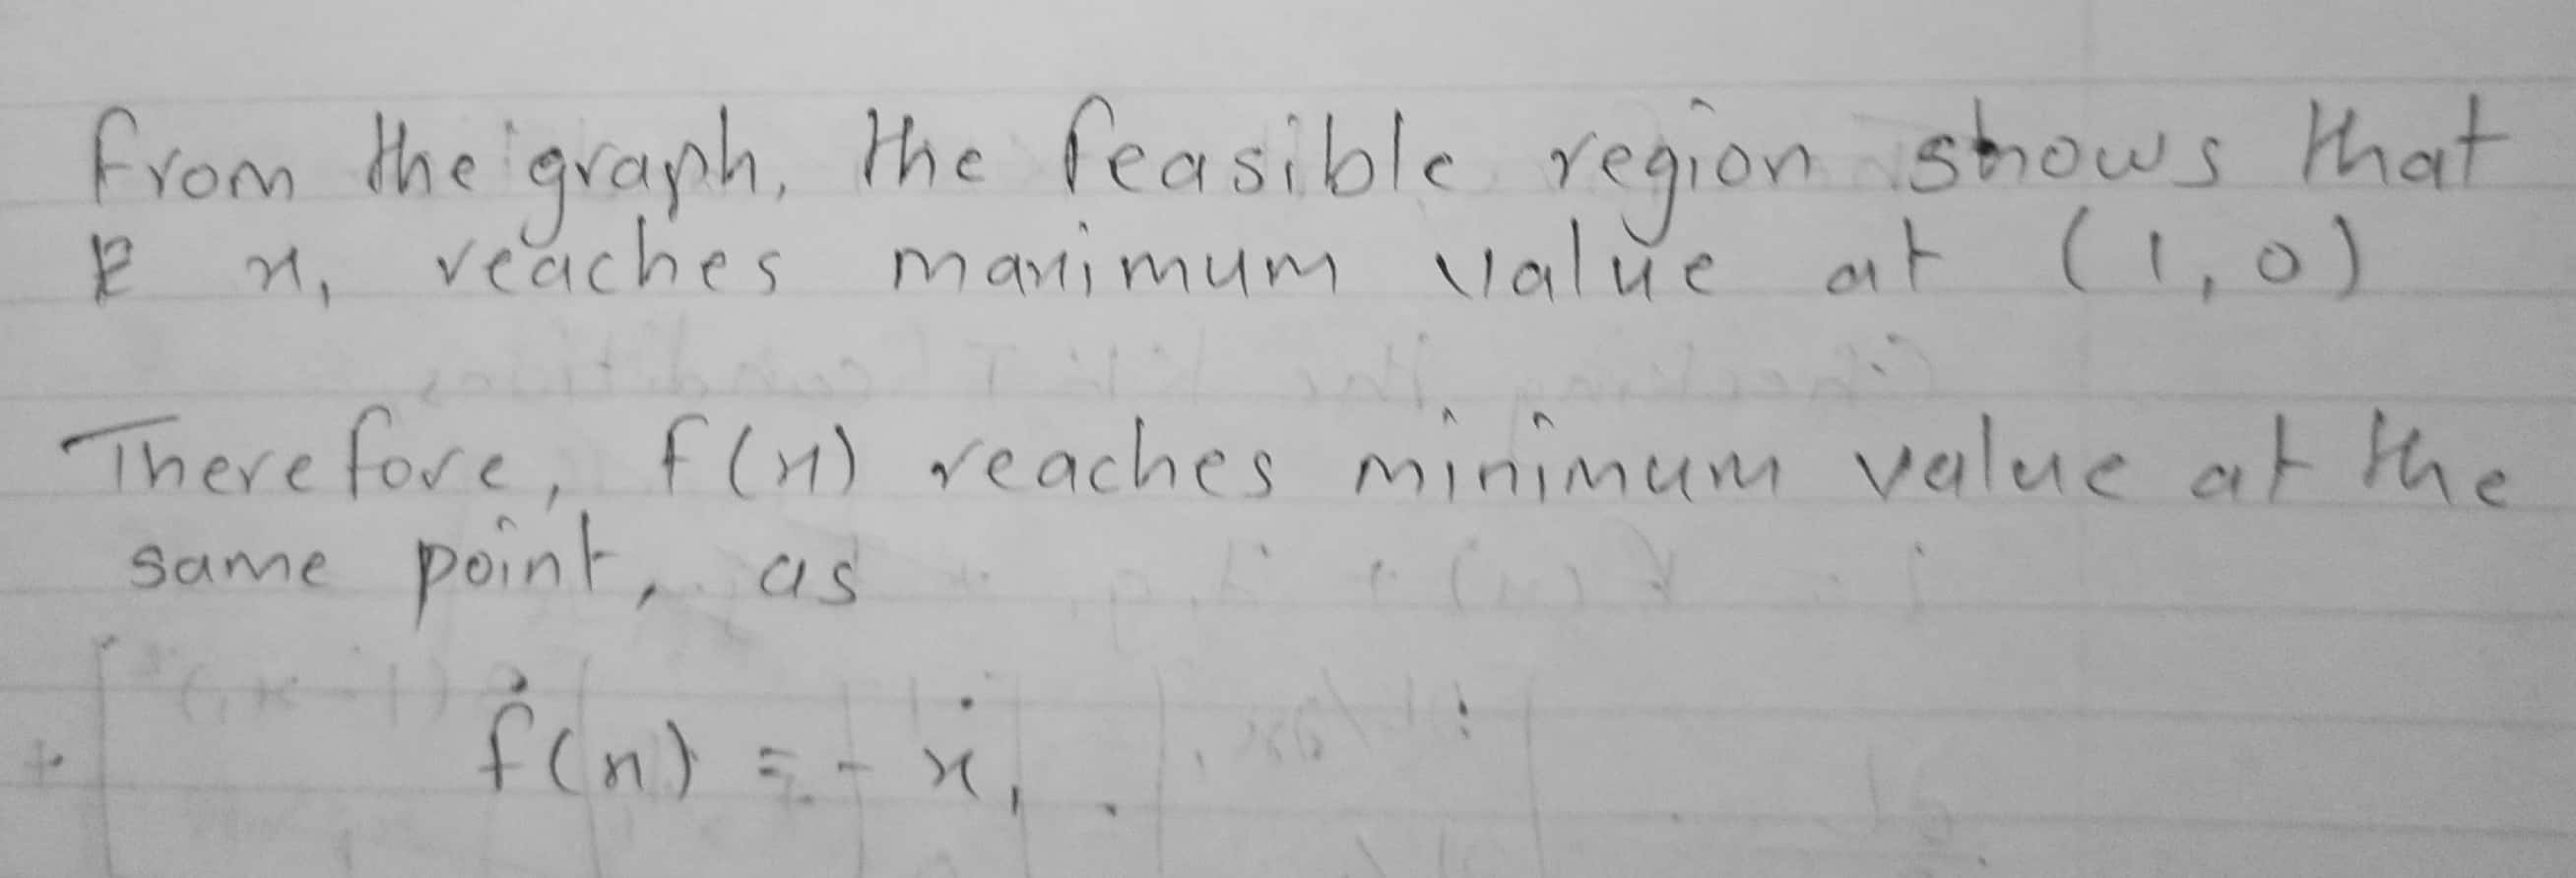

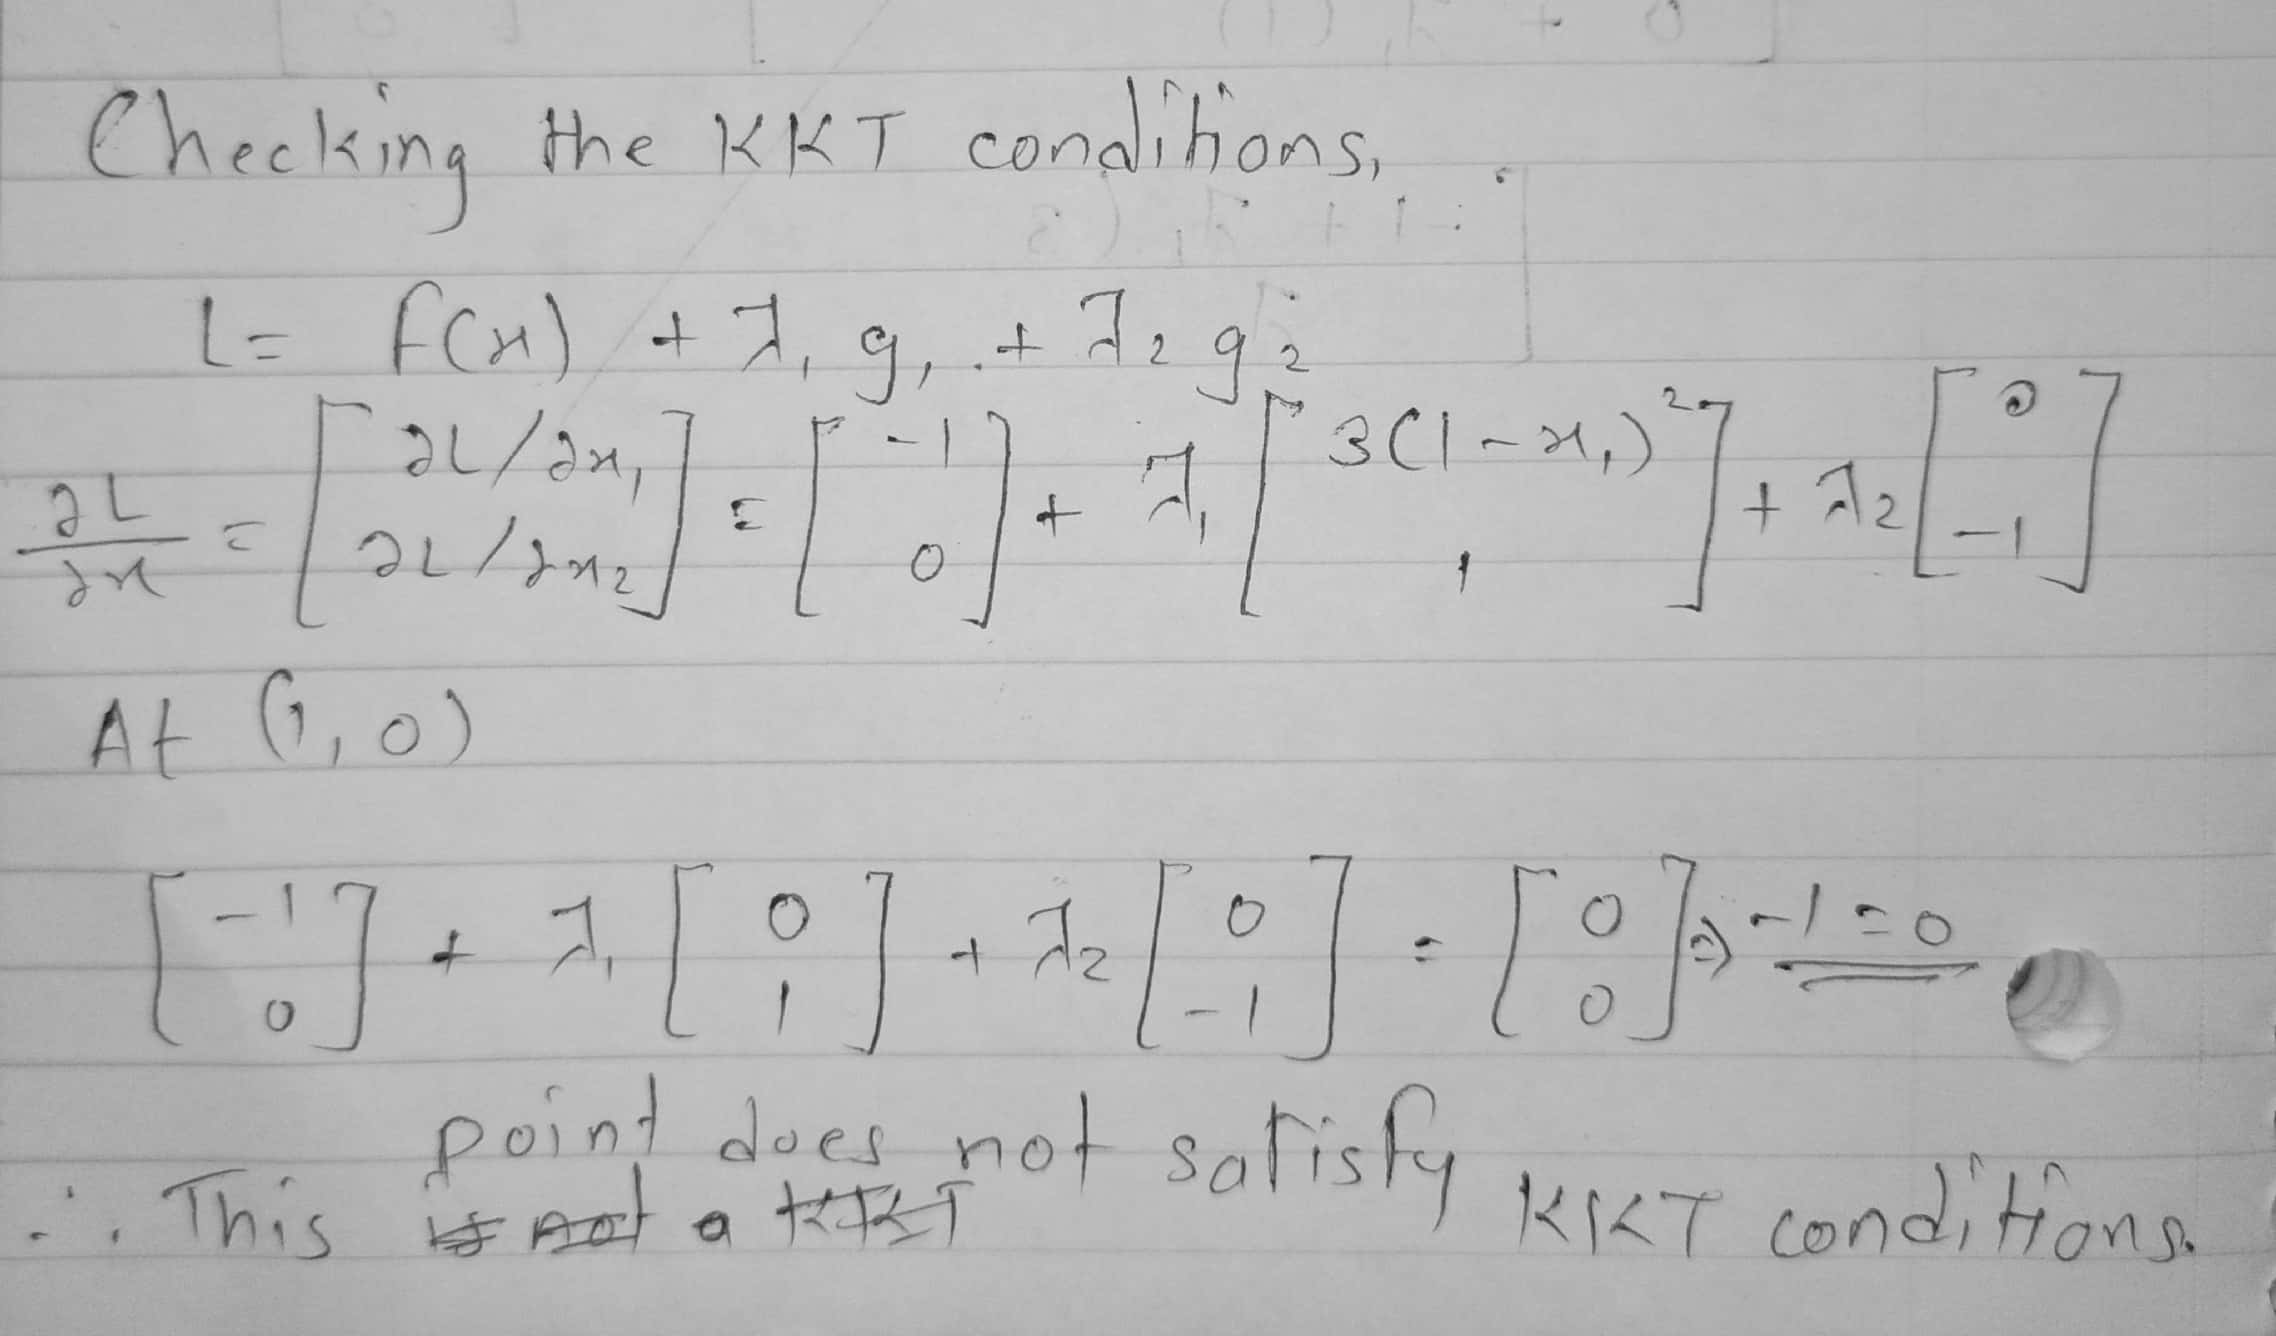

##Problem 3

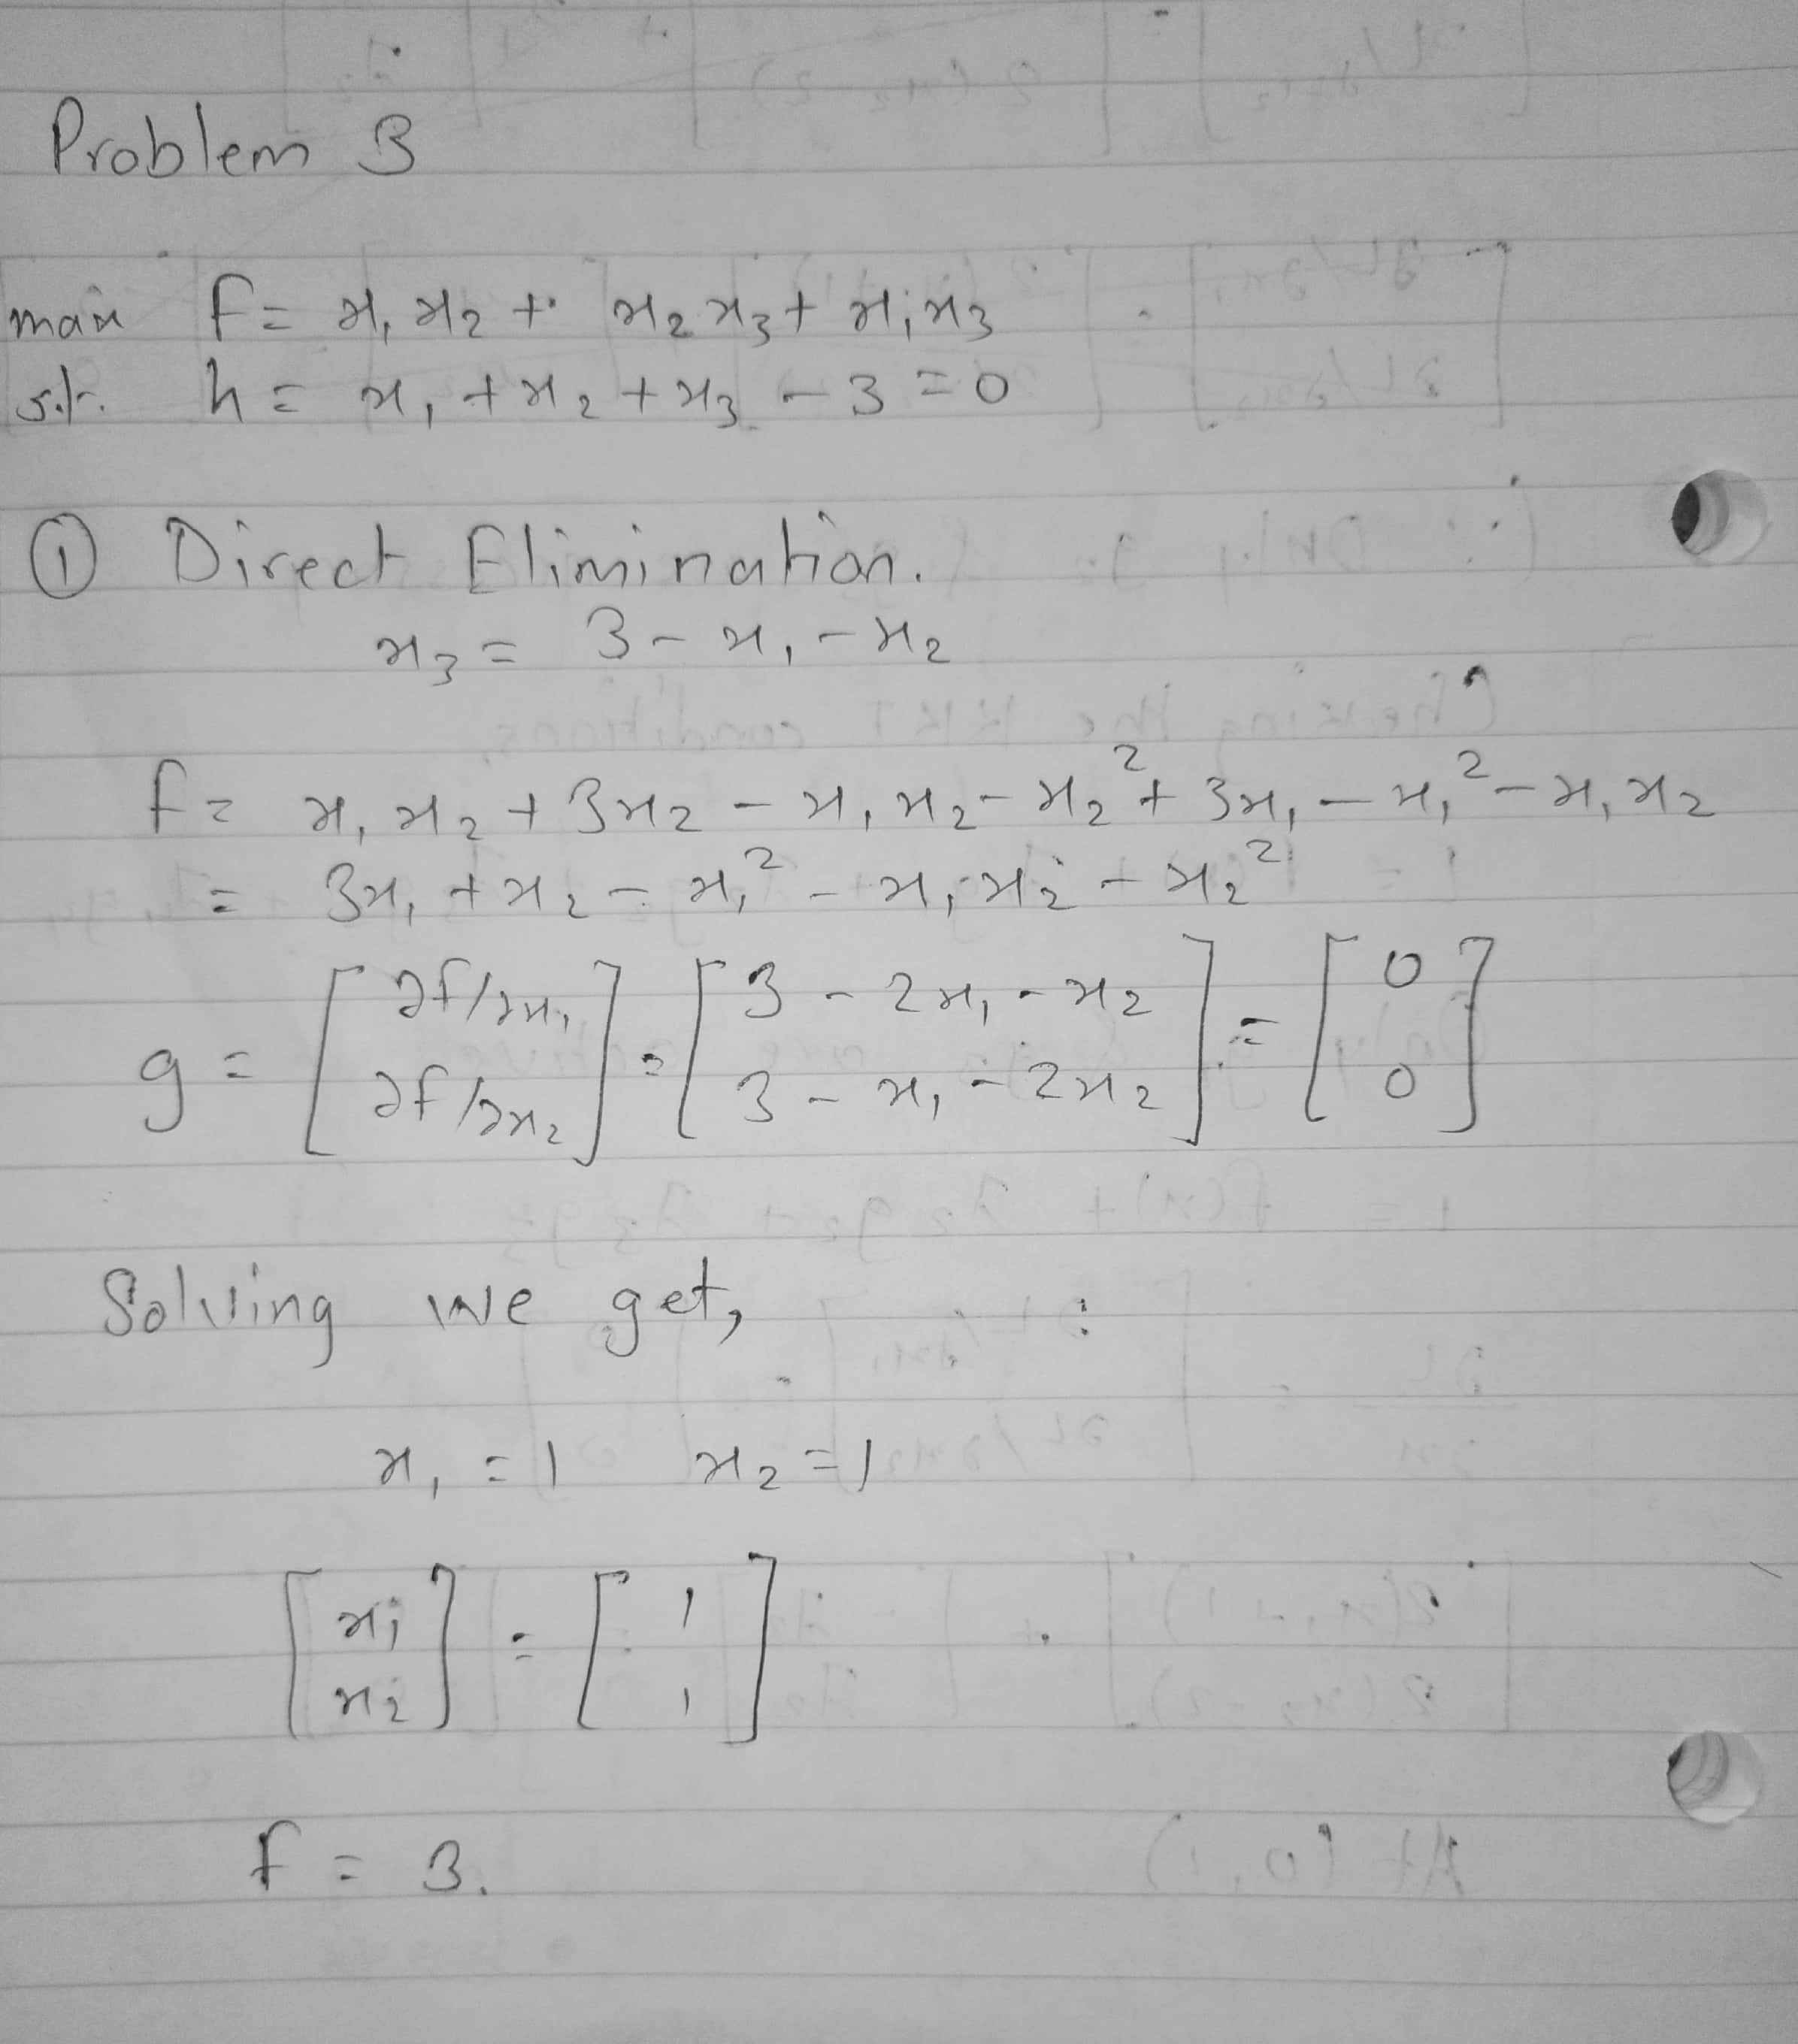

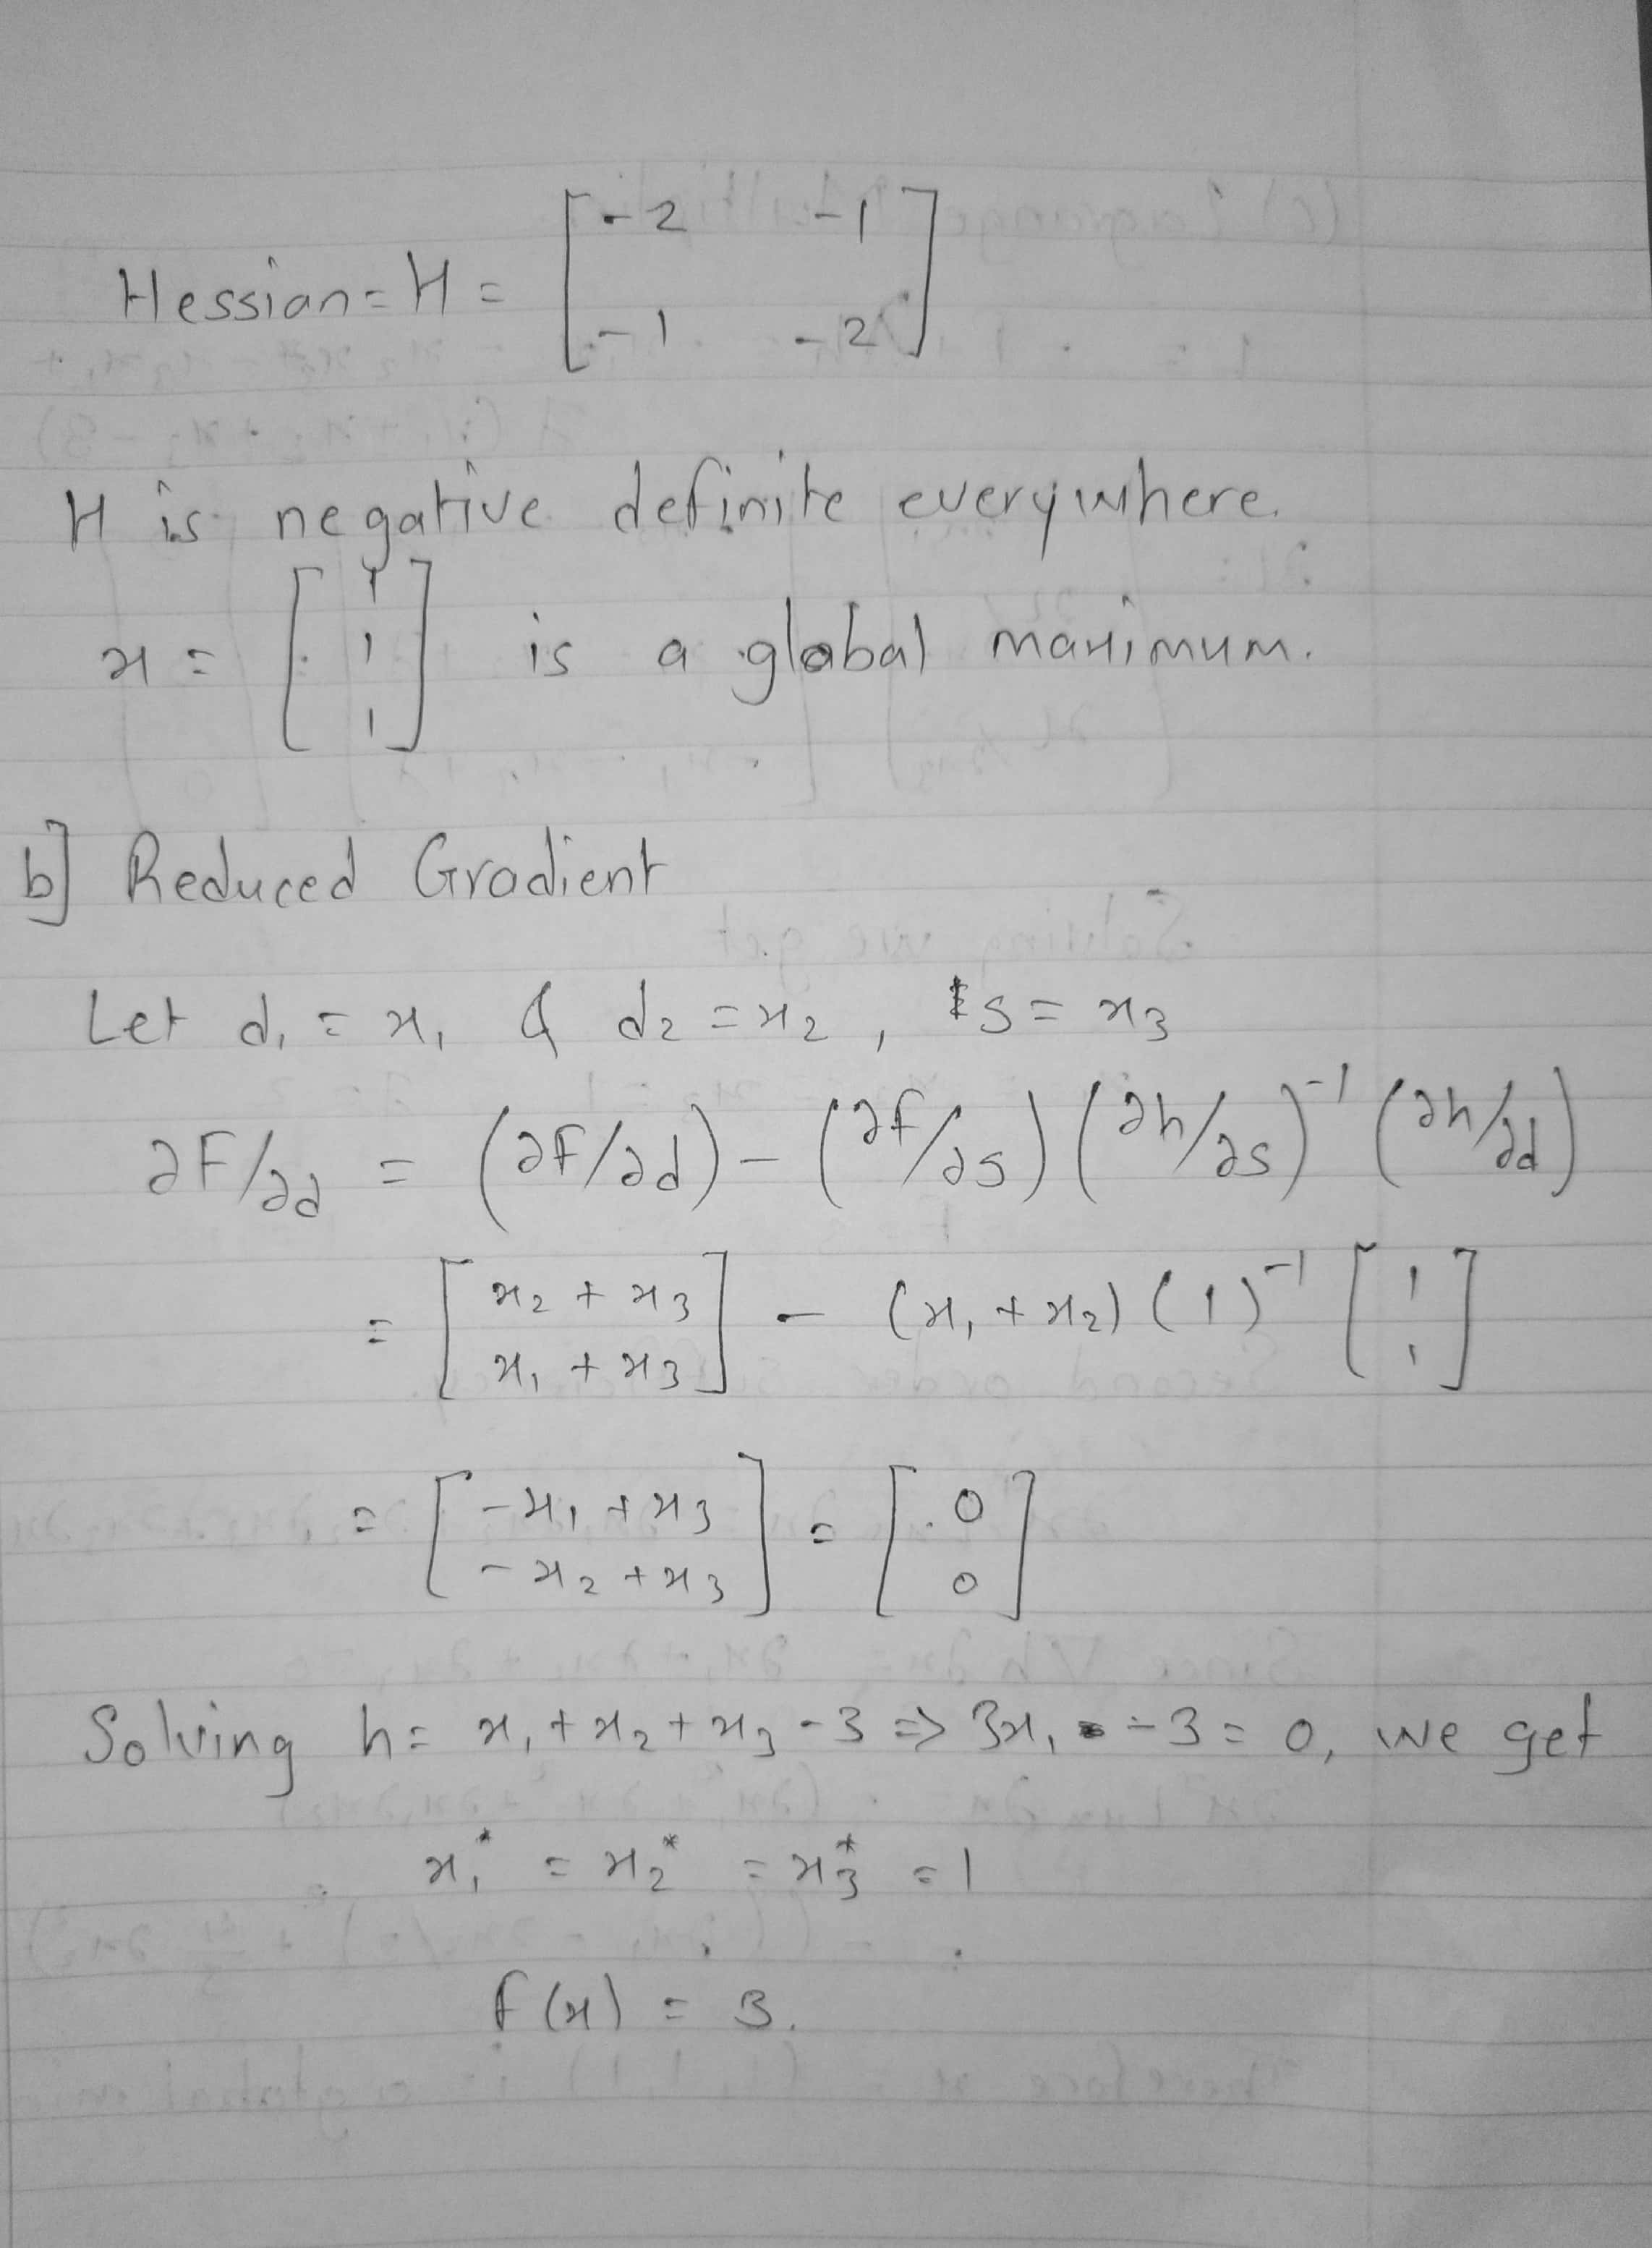

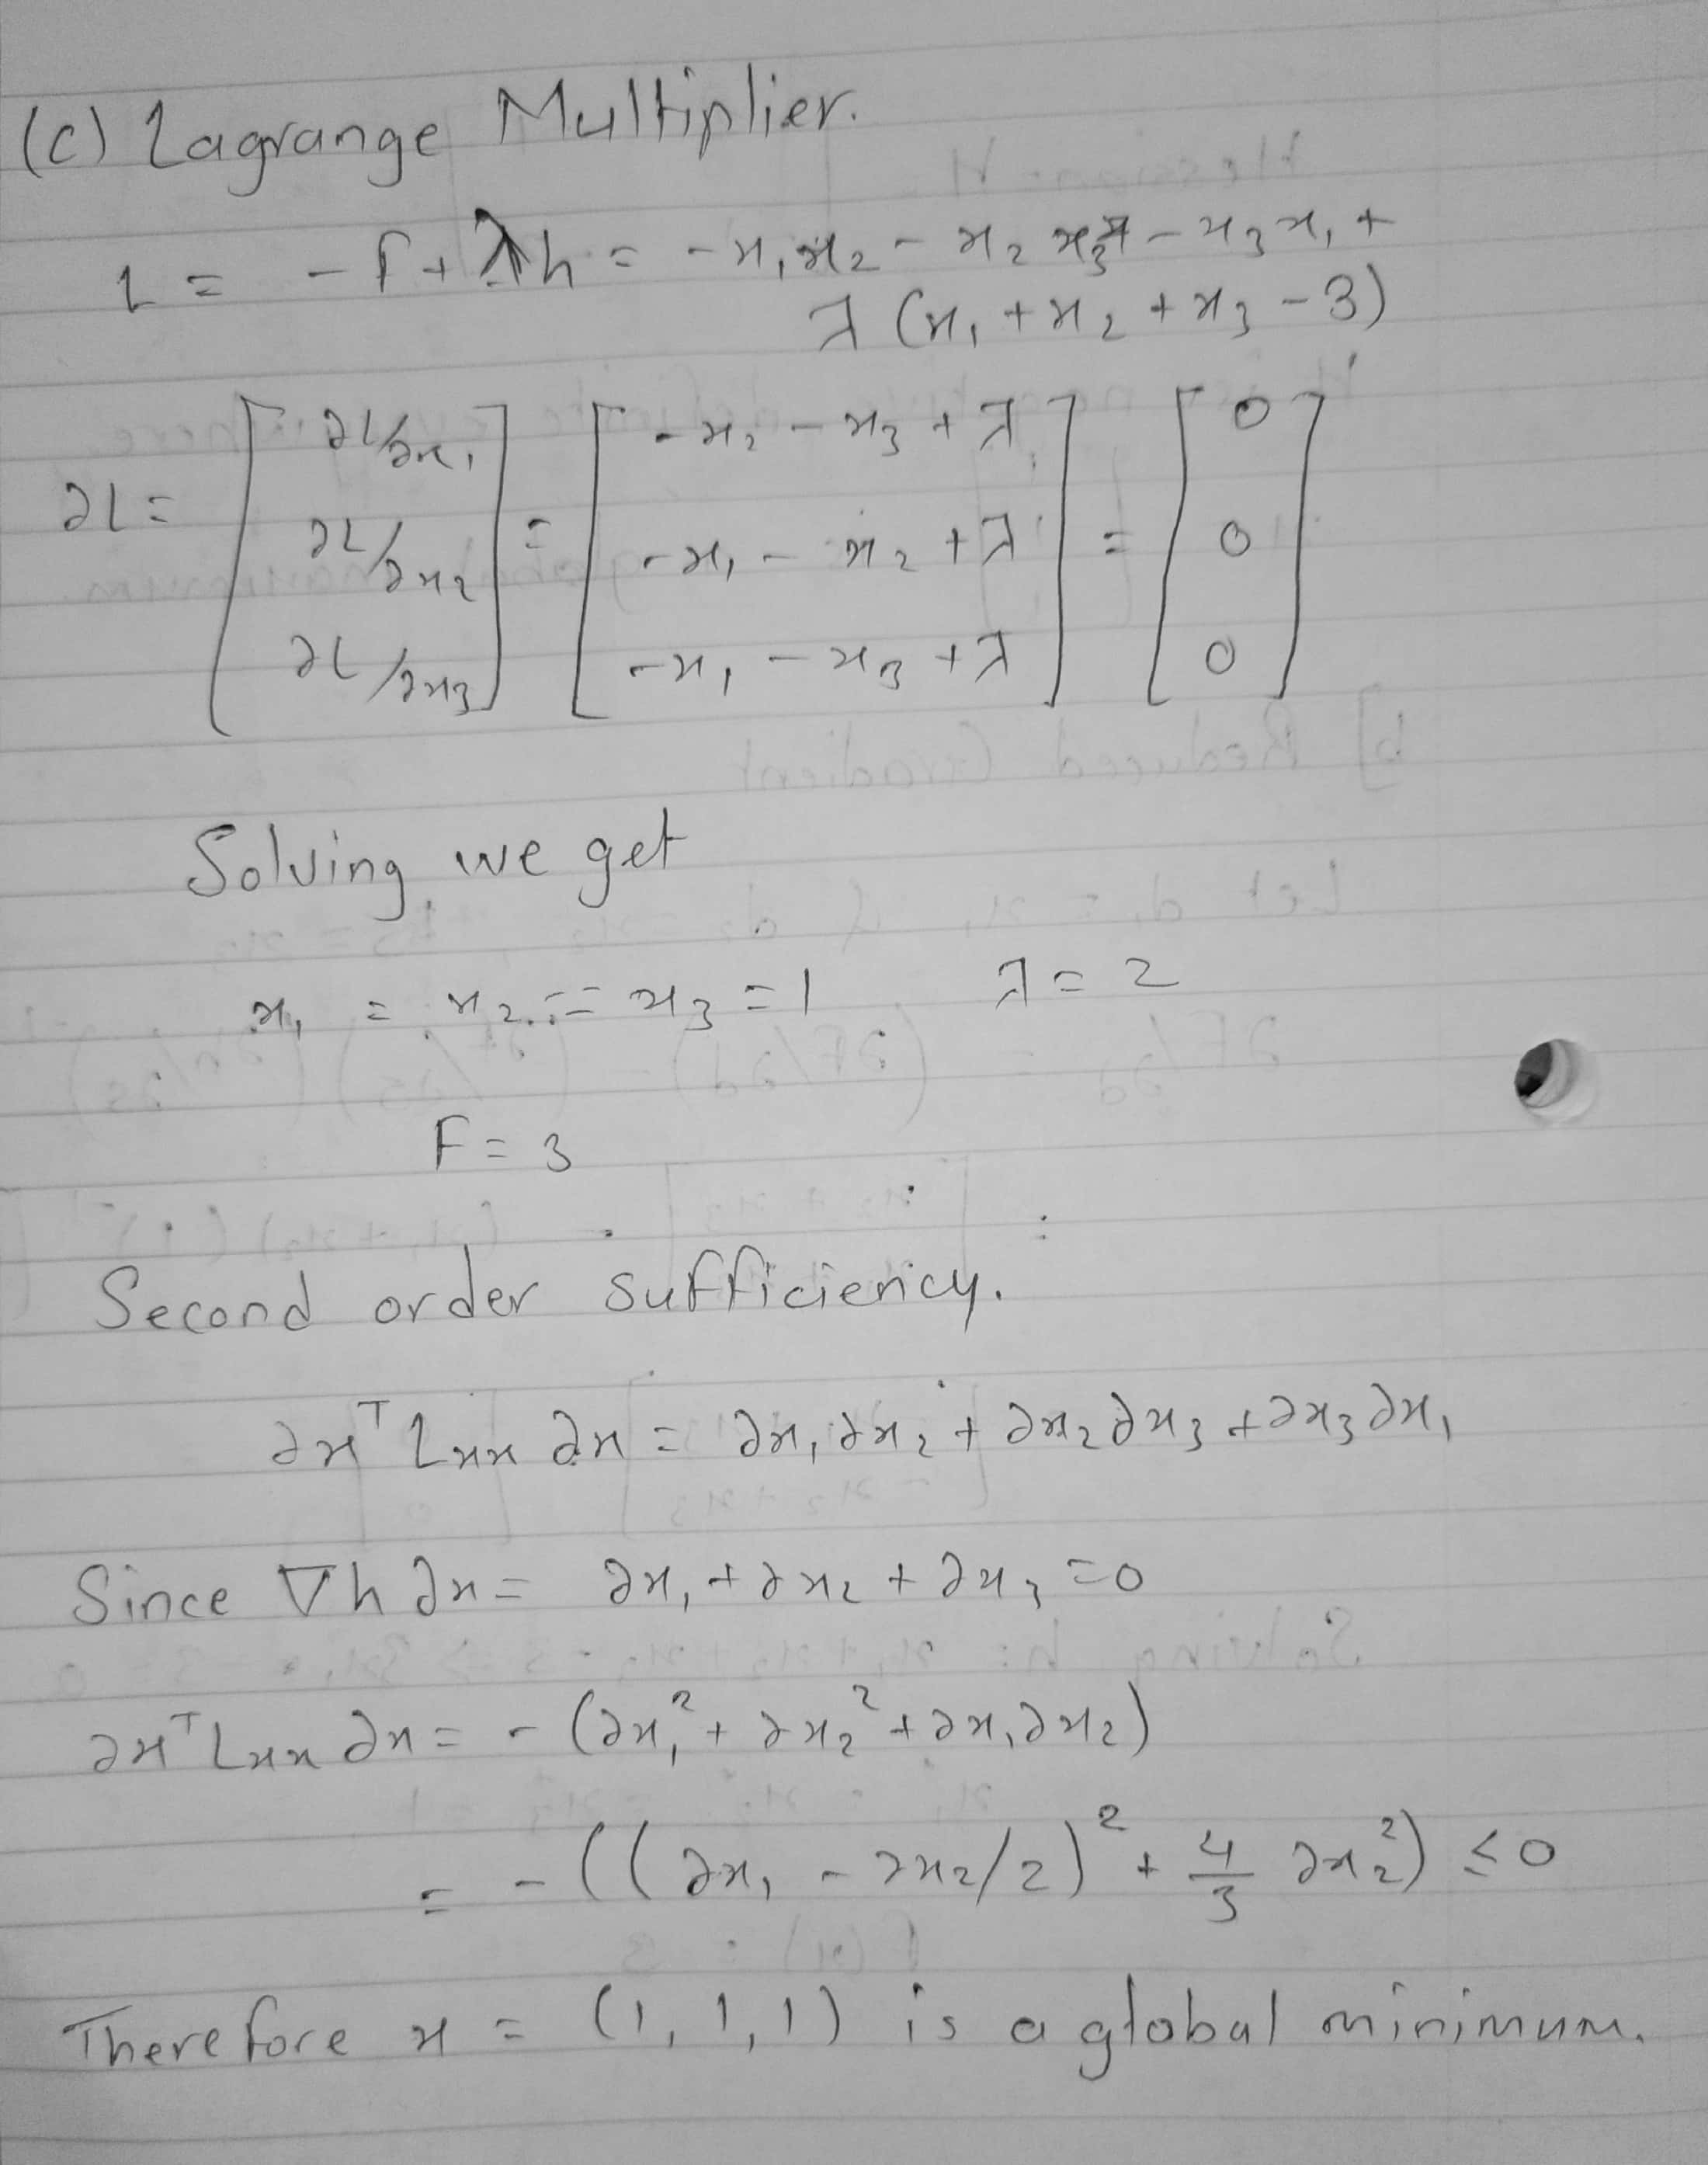

## Problem 4

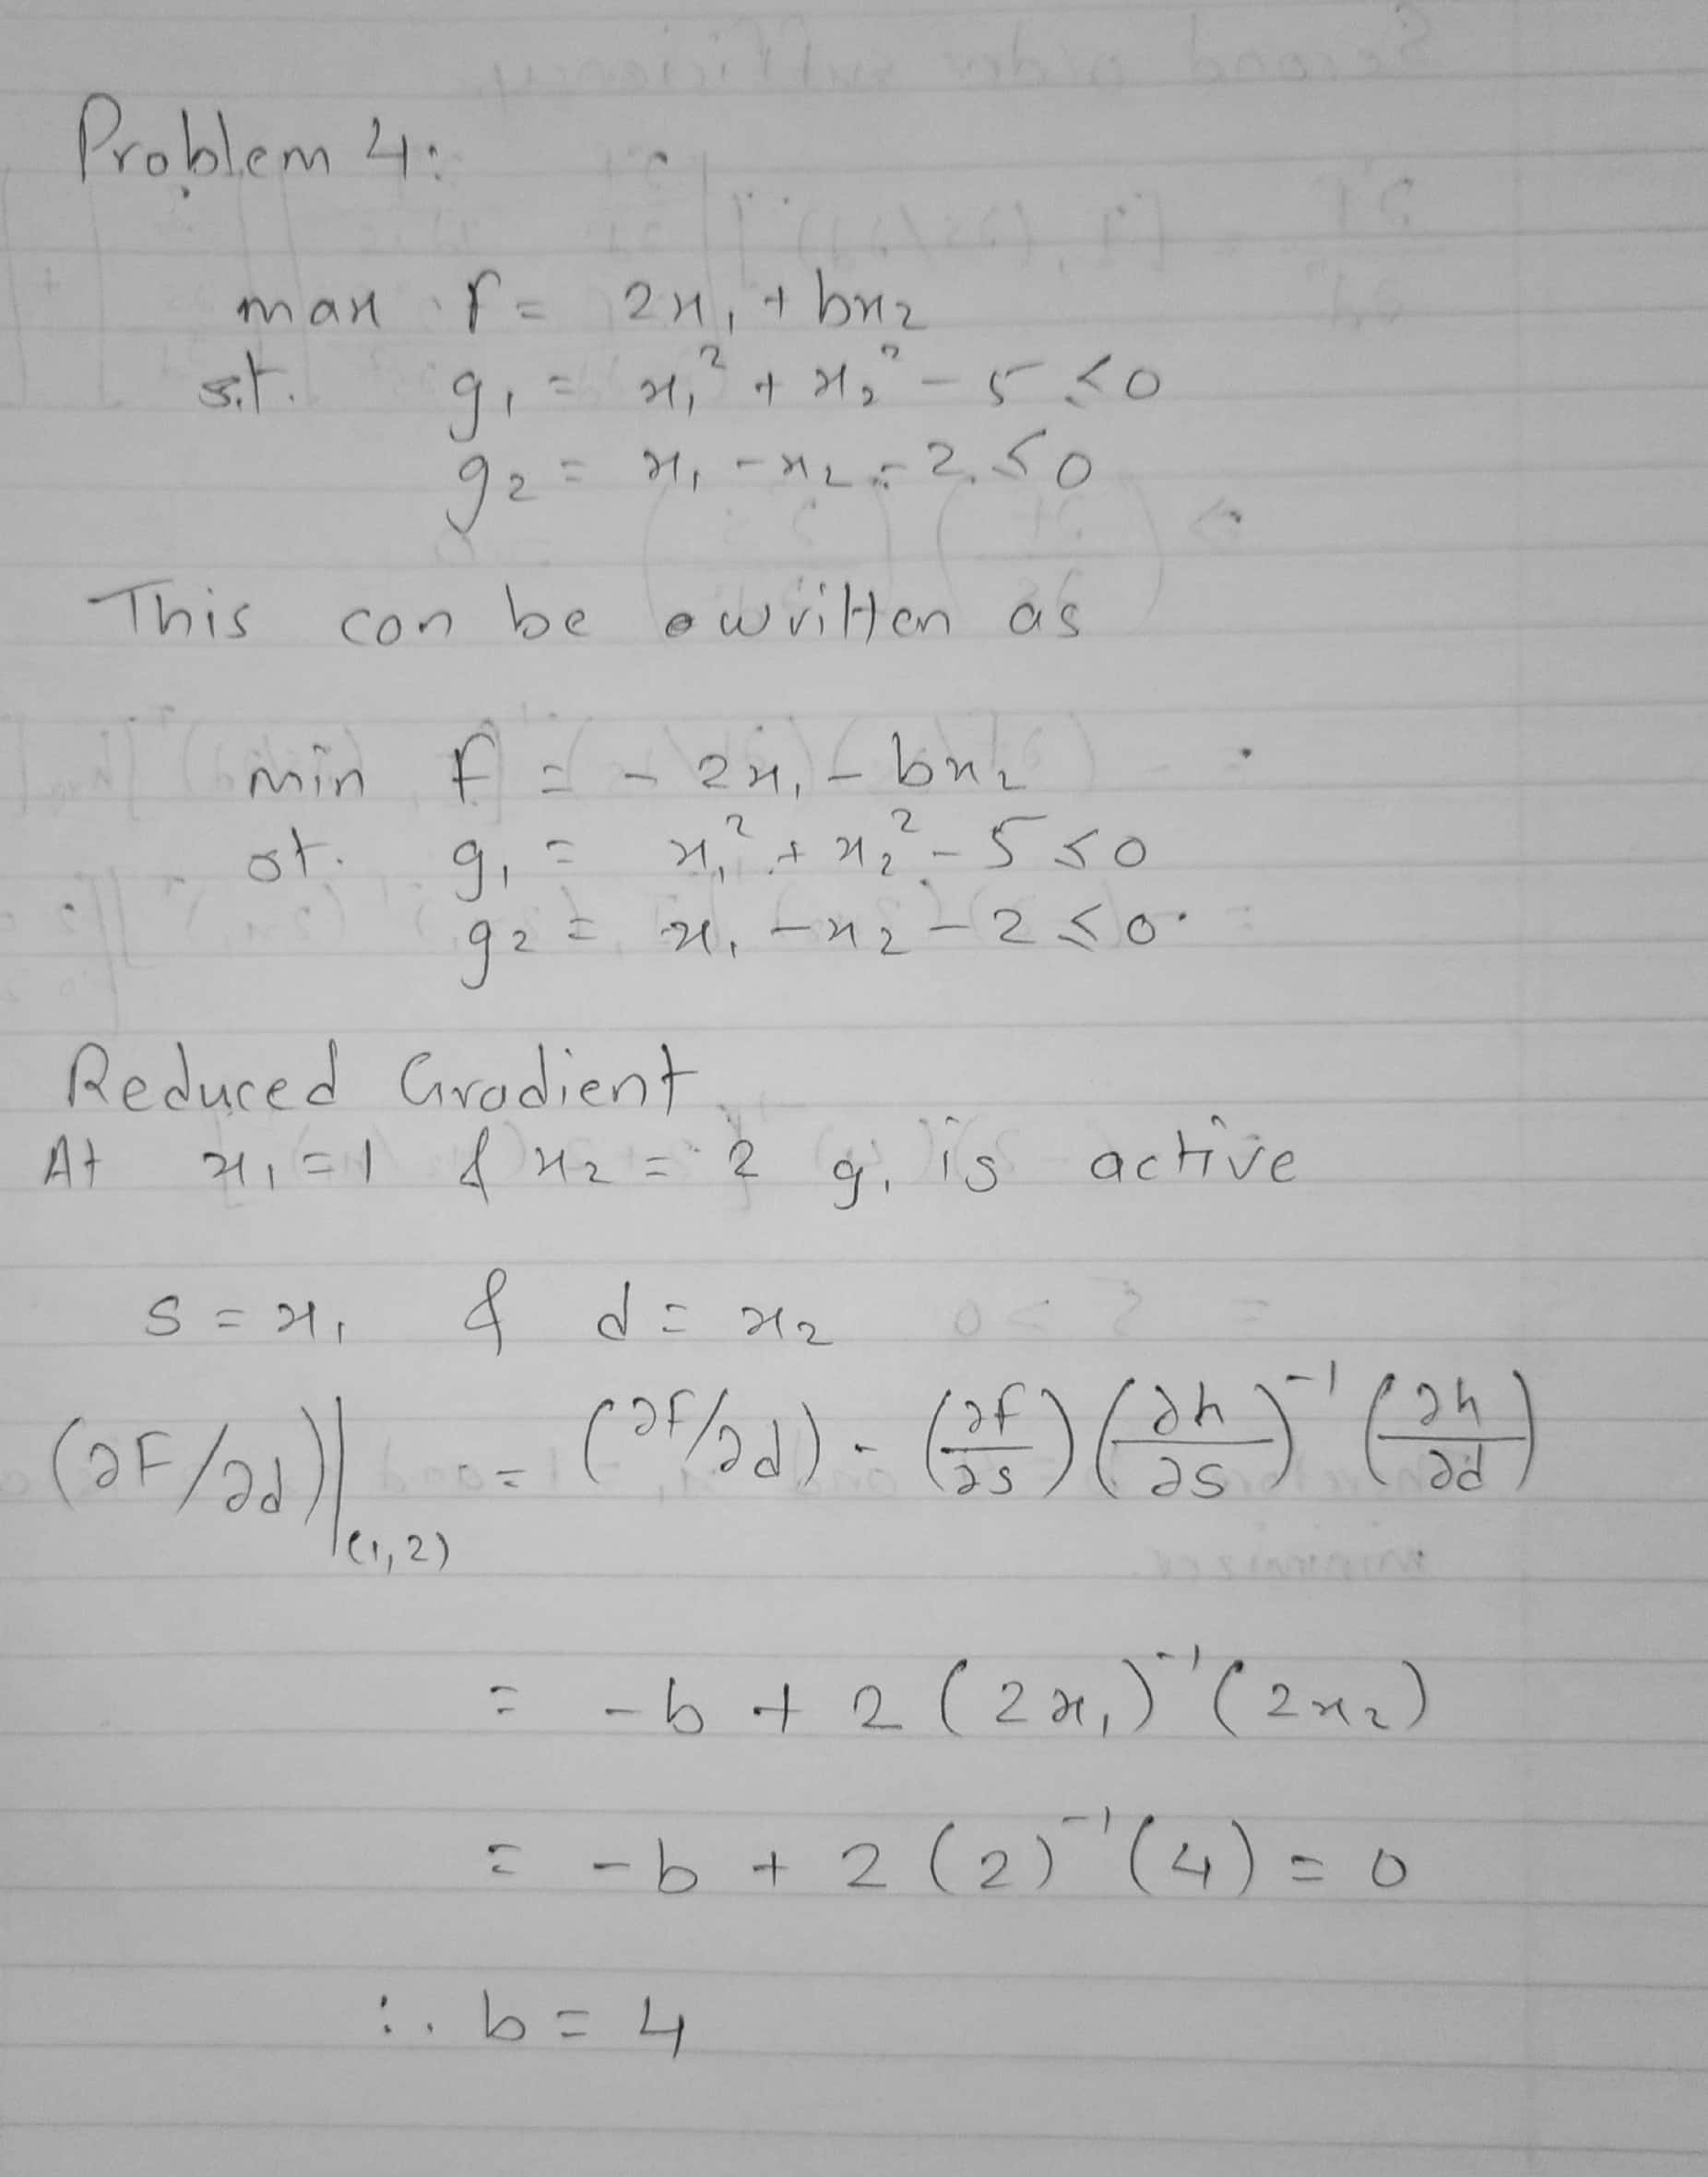

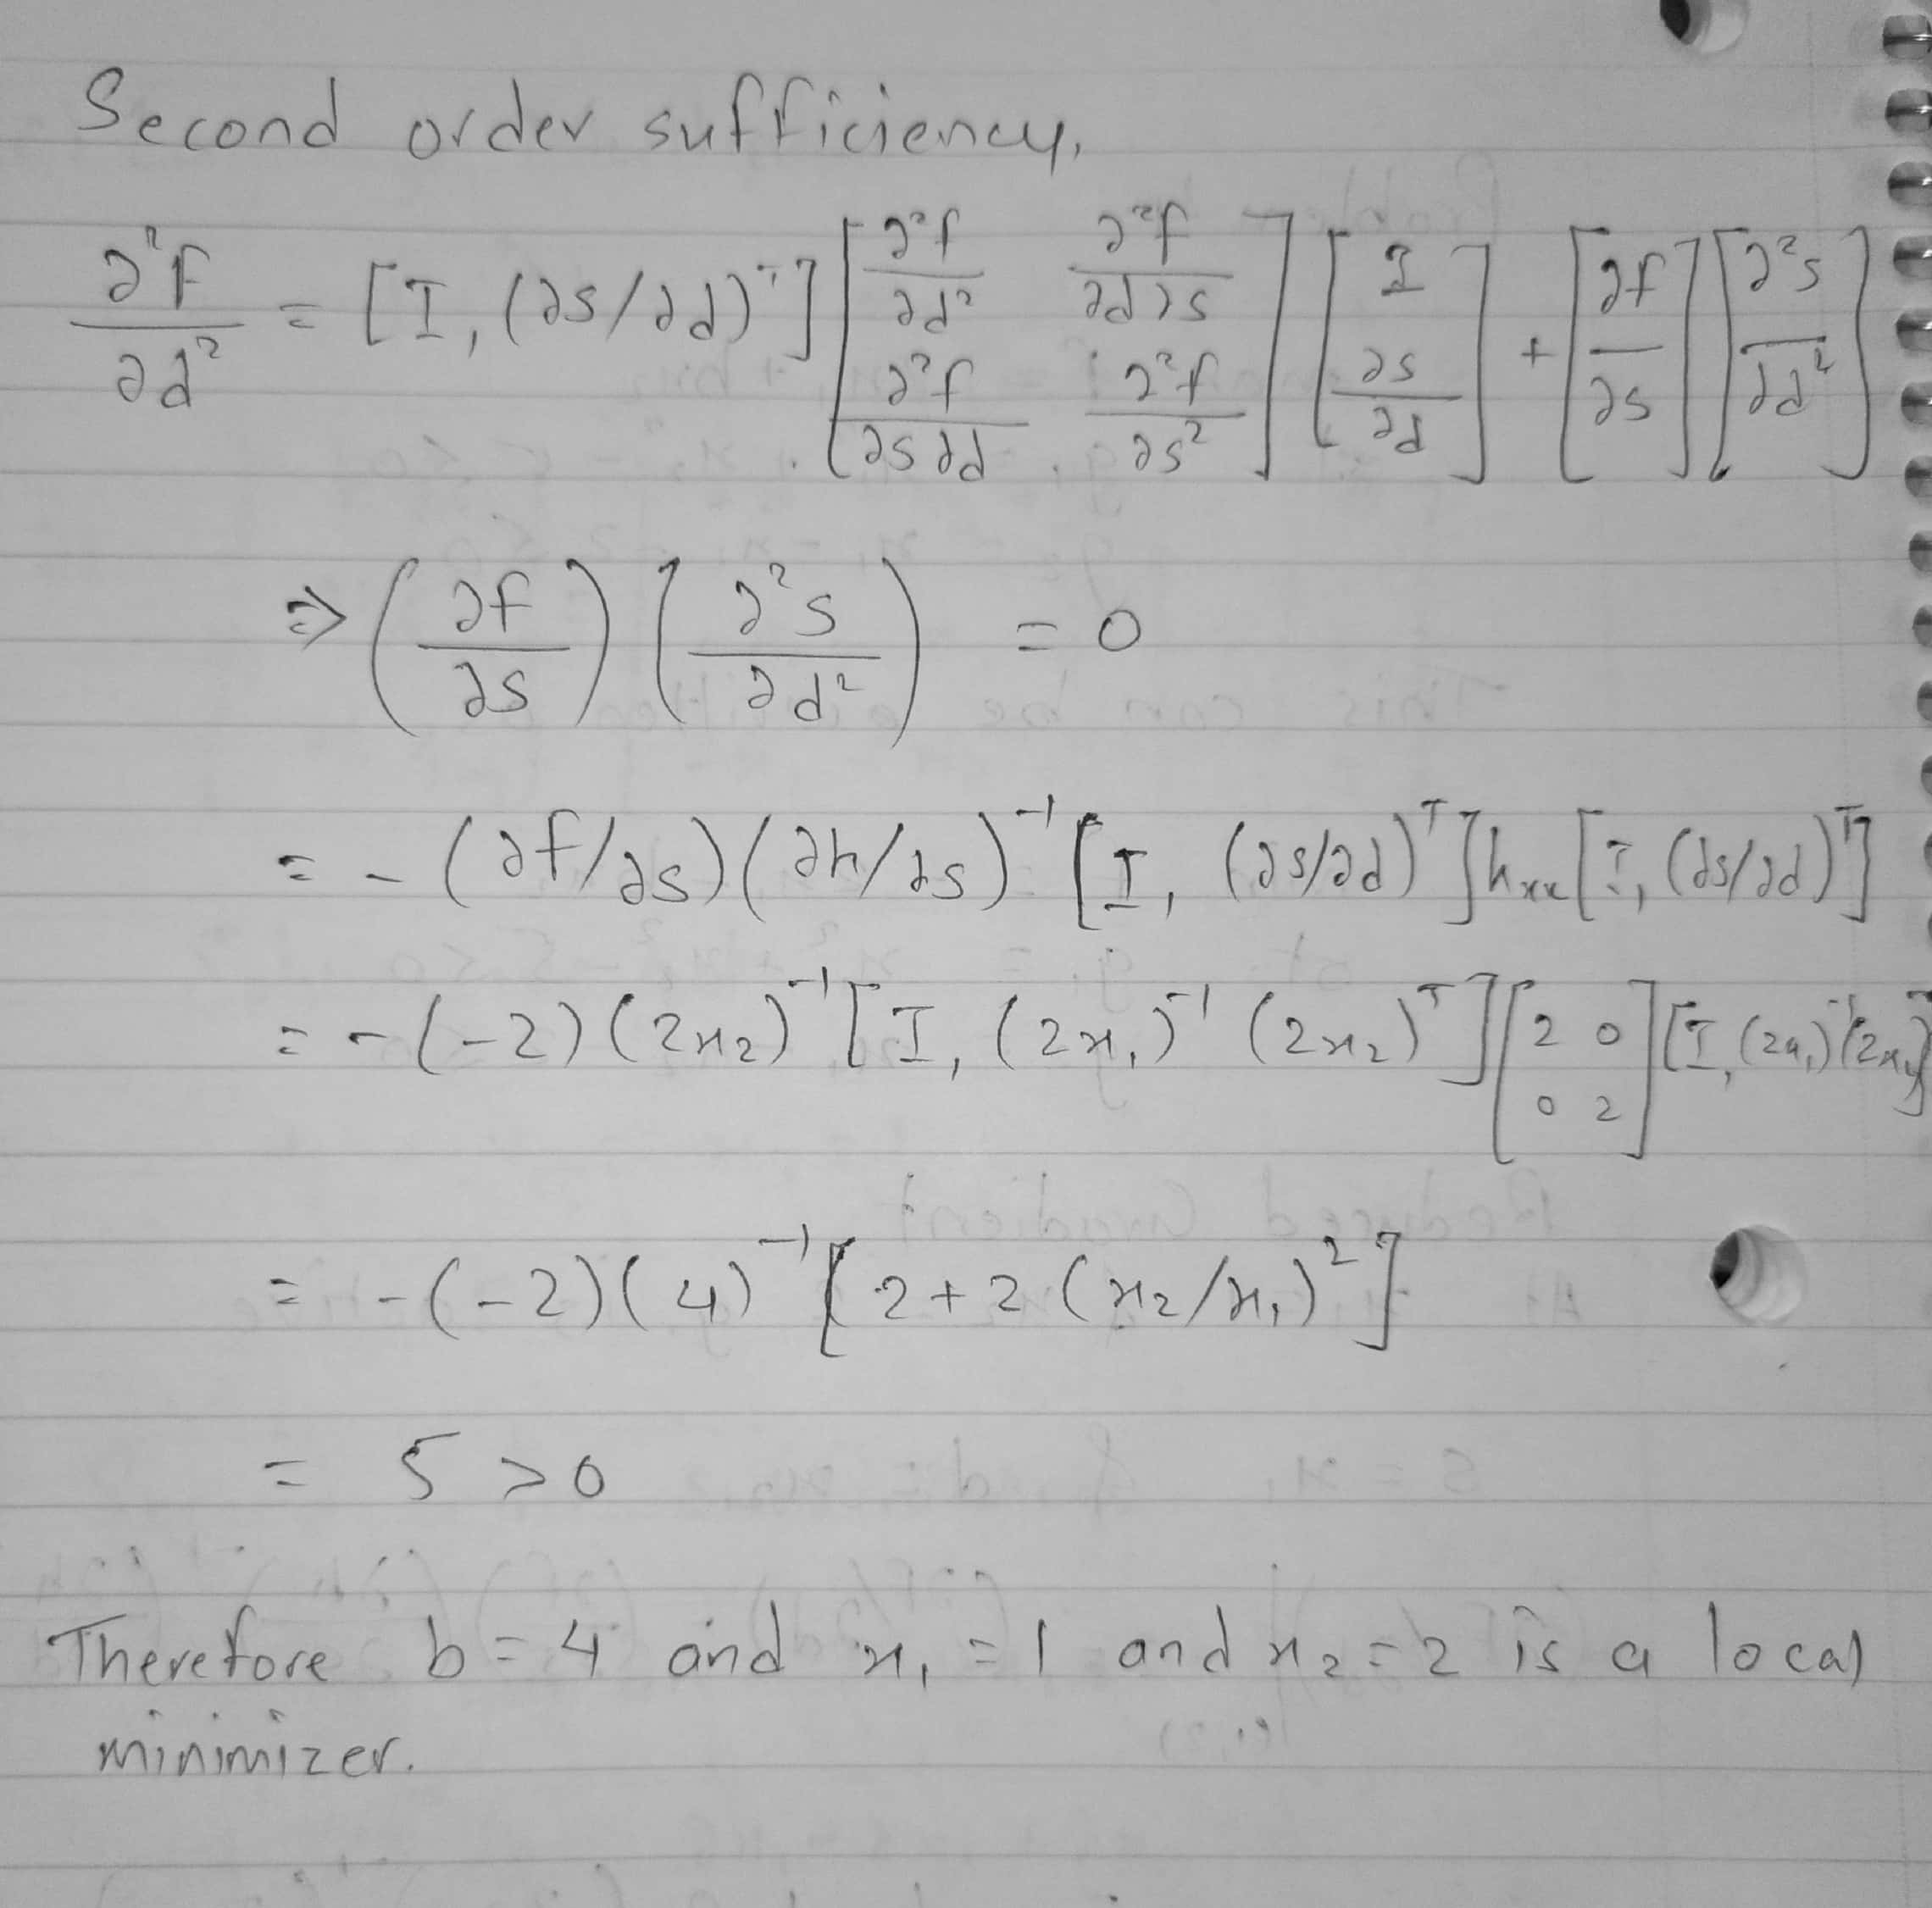

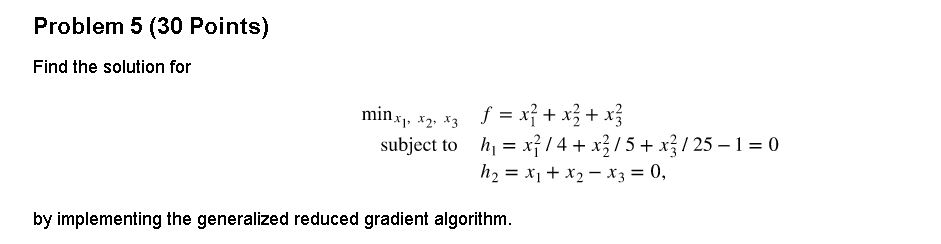

In [ ]:
# Generalized Reduced Gradient Algorithm 

import numpy as np
import matplotlib.pyplot as plt
from sympy import *

def generalized_reduced_gradient():

	x1, x2, x3 = symbols('x1 x2 x3')
	xvars = [x1, x2, x3]

	fx =  x1**2	+ x2**2 + x3**2				# Function to be minimized
	hxs =  [((x1**2)/4) + ((x2**2)/5) + ((x3**2)/25) -1, x1 + x2 - x3 ]		# Constraints to be obeyed
	alpha_0 = 1											# Parameter initializations
	gamma = 0.4
	max_iter = 2
	max_outer_iter = 1
	eps_1, eps_2, eps_3 = 0.001, 0.001, 0.001

	xcurr = np.array([1, 3, 4])							# Starting solution

	dfx = np.array([diff(fx, xvar) for xvar in xvars])
	dhxs = np.array([[diff(hx, xvar) for xvar in xvars] for hx in hxs])
	nonbasic_vars = len(xvars) - len(hxs)
	opt_sols = []

	for outer_iter in range(max_outer_iter):

		print('\n\n optimal solution: {0}'.format(xcurr))
		opt_sols.append(fx.subs(zip(xvars, xcurr)))

		# Step 1

		delta_f = np.array([df.subs(zip(xvars, xcurr)) for df in dfx])
		delta_h = np.array([[dh.subs(zip(xvars, xcurr)) for dh in dhx] for dhx in dhxs])		# Value of h'_i(xcurr) for all i
		J = np.array([dhx[nonbasic_vars:] for dhx in delta_h])									# Computation of J and C matrices
		C = np.array([dhx[:nonbasic_vars] for dhx in delta_h])
		delta_f_bar = delta_f[nonbasic_vars:]
		delta_f_cap = delta_f[:nonbasic_vars]

		J_inv = np.linalg.inv(np.array(J, dtype=float))
		delta_f_tilde = delta_f_cap - delta_f_bar.dot(J_inv.dot(C))

		# Step 2

		if abs(delta_f_tilde[0]) <= eps_1:
			break

		d_bar = - delta_f_tilde.T 									# Direction of search in current iteration
		d_cap = - J_inv.dot(C.dot(d_bar))
		d = np.concatenate((d_bar, d_cap)).T

		# Step 3

		alpha = alpha_0

		while alpha > 0.001:

			# Step 3(a)

			v = xcurr.T + alpha * d
			v_bar = v[:nonbasic_vars]
			v_cap = v[nonbasic_vars:]
			flag = False

			for iter in range(max_iter):
				h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
				if all([abs(h_i) < eps_2 for h_i in h]):				# Check if candidate satisfies all constraints
					if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
						alpha = alpha * gamma
						break
					else:
						xcurr = v 						# Obtained a candidate better than the current optimal solution
						flag = True
						break

				# Step 3(b)

				delta_h_v = np.array([[dh.subs(zip(xvars, v)) for dh in dhx] for dhx in dhxs])
				J_inv_v = np.linalg.inv(np.array([dhx[nonbasic_vars:] for dhx in delta_h_v], dtype=float))
				v_next_cap = v_cap - J_inv_v.dot(h)

				# Step 3(c)

				if abs(np.linalg.norm(np.array(v_cap - v_next_cap, dtype=float), 1)) > eps_3:
					v_cap = v_next_cap
					v = np.concatenate((v_bar, v_cap))
				else:
					v_cap = v_next_cap
					v = np.concatenate((v_bar, v_cap))
					h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
					if all([abs(h_i) < eps_2 for h_i in h]):

						# Step 3(d)

						if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
							alpha = alpha * gamma				# Search for lower values of alpha
							break
						else:
							xcurr = v
							flag = True
							break
					else:
						alpha = alpha * gamma
						break
			
			if flag == True:
				break

	print('\n\nFinal solution obtained is: {0}'.format(xcurr))
	print('Value of the function at this point: {0}\n'.format(fx.subs(zip(xvars, xcurr))))

	plt.plot(opt_sols, 'ro')								# Plot the solutions obtained after every iteration
	plt.show()

if __name__ == '__main__':
	generalized_reduced_gradient()



 optimal solution: [1 3 4]
